# Neutrino Cooling

At high temperatures, pair, plasma, Bremmstrahlung, and photo neutrinos become important. These are often treated as a source term to an energy equation when integrating the temperature evolution due to reactions.

pynucastro implements the functions of {cite:t}`itoh:1996` to incorporate these effects.  In many codes, a routine called ``sneut5`` was used for this implementation.  pynucastro contains a port of that routine.

In [1]:
from pynucastro.neutrino_cooling import sneut5, NeutrinoCooling
from pynucastro import Composition, Nucleus

## Evaluating $\epsilon_\nu$ for a thermodynamic state

We can evaluate the cooling term given a density, temperature and composition.  First we setup the thermodynamic state:

In [2]:
rho = 1.e8
T = 2.e9
comp = Composition([Nucleus("p"), Nucleus("a"), Nucleus("fe56")])
comp.set_equal()

Now we call the {py:meth}`sneut5 <pynucastro.neutrino_cooling.sneut5_mod.sneut5>` function.

In [3]:
snu = sneut5(rho, T, comp)
print(snu)

773682819.5195054


This is the value in CGS units (erg/g/s)

If we want to see the breakdown of the different contributions, we pass ``full_output=True``

In [4]:
snu, scomps = sneut5(rho, T, comp, full_output=True)
print(scomps)

splas: 537968613.1923463; spair: 131726610.15324067; sphot: 92135106.99413596; sbrem: 11852489.17978244; sreco: 0.0


## Plotting $\epsilon_\nu$ in the $\rho$-$T$ plane

We can see the trend with thermodynamics state by using the {py:obj}`NeutrinoCooling <pynucastro.neutrino_cooling.neutrino_cooling.NeutrinoCooling>` class

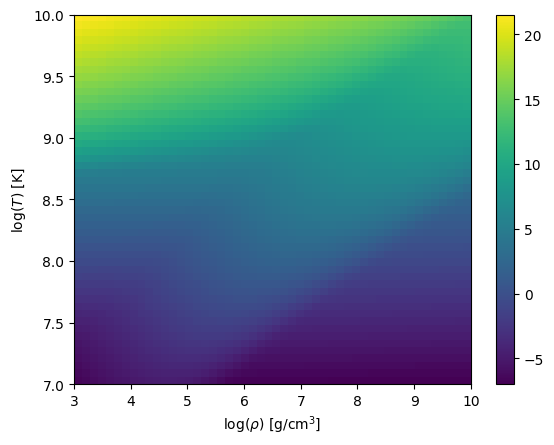

In [5]:
nc = NeutrinoCooling()
fig = nc.plot(Tmin=1.e7, Tmax=1.e10, rhomin=1.e3, rhomax=1.e10,
              abar=comp.abar, zbar=comp.zbar)